<strong><font color=green> **** Note:  All the inferences are written in green

# Steps taken:
**1. Data Cleaning**
- Checking missing values
- Filling missing values with 0 wherever required
- Dropping column with high missing values
- Dropping column with high skewness

**2. Filtering HVC**

**3. Deriving 'Churn'**

**4. Imputing Missing values**
- Imputing missing values using KNN Imputer

**5. Creating Derived variables**

**6. Exploratory Data Analysis**
- Analyzing 8th month variables with Churn variable
- Checking correlation and dropping highly correlated variables
- Outliers detection

**7. Data Preparation**
- Dummy encoding the vategorical variables
- Train and Test split
- Performing power transformer as outlier treatment
- Standardizing the variables
- Using RFE for feature selection

**8. Model Building**
- ***Part1 - Interpretable model(XGBoost)***
- Building model using default parameters
- Building model using GridSearch parameters
- Analyzing Feature importance
- Finding optimal threshold
- Predicting Test data set
- ***Part2 - High performance models***
- Standardizing the variables
- Plotting scree plot
- Performing PCA
- ***Building models after performing PCA***
- Logistic Regression model
- Random Forest Model
- Decision Tree model
- Support Vector Machines - Classifier
- XGBoost model

# Import relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib.pyplot import rcParams
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Setting display options

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

# Importing the data

In [ ]:
# Importing the dataset

tele = pd.read_csv('telecom_churn_data.csv')

In [ ]:
# Checking the head of the data set

tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
# Checking the shape of the data set

tele.shape

(99999, 226)

In [ ]:
# Looking at info of columns

tele.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [ ]:
# Checking for outliers, central tendency and variance of numerical columns in the data

tele.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# 1. Data Cleaning

In [ ]:
# Checking for duplicates

tele.duplicated().sum()

0

<strong><font color=green>There are no duplicate rows

- **Checking Missing vales across the columns**

In [ ]:
# Checking for missing values

tele.isnull().sum()/len(tele.index)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [ ]:
len(tele.columns[100*(tele.isnull().sum())/tele.shape[0]>0])

166

In [ ]:
len(tele.columns[100*(tele.isnull().sum())/tele.shape[0]>70])

40

<strong><font color= green>
- Out of 226 columns, 166 are having some missing data
- Out of which 40 have more then 70% of missing values
</font></strong>

Before droping any column let's first check whether those missing are actual missing or meaningful missing and can be imputed by some value

- **Analyzing data recharge columns**

In [ ]:
col = ['date_of_last_rech_data_6', 'total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6',
       'date_of_last_rech_data_7', 'total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7',
       'date_of_last_rech_data_8', 'total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8',
       'date_of_last_rech_data_9', 'total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9']


In [ ]:
for var in col:
    print('*************  ' + var + '  *************')
    print(100*tele[var].value_counts(normalize=True,dropna=False).head())
    print('\n\n')

*************  date_of_last_rech_data_6  *************
NaN          74.846748
6/30/2014     1.888019
6/29/2014     1.651017
6/28/2014     1.643016
6/26/2014     1.384014
Name: date_of_last_rech_data_6, dtype: float64



*************  total_rech_data_6  *************
NaN    74.846748
1.0    13.309133
2.0     5.186052
3.0     2.065021
4.0     1.335013
Name: total_rech_data_6, dtype: float64



*************  max_rech_data_6  *************
NaN      74.846748
154.0     4.900049
25.0      4.402044
252.0     3.144031
98.0      1.441014
Name: max_rech_data_6, dtype: float64



*************  count_rech_2g_6  *************
NaN    74.846748
1.0    10.902109
0.0     5.920059
2.0     3.240032
3.0     1.461015
Name: count_rech_2g_6, dtype: float64



*************  count_rech_3g_6  *************
NaN    74.846748
0.0    15.788158
1.0     6.742067
2.0     1.541015
3.0     0.514005
Name: count_rech_3g_6, dtype: float64



*************  av_rech_amt_data_6  *************
NaN      74.846748
154.0     

What is value for other columns when data recharge date is missing?

In [ ]:
tele[col].describe()

,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_3g_7,arpu_2g_7,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9
count,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,25922.000000,25922.00000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000
mean,2.463802,126.393392,1.864668,0.599133,192.600982,89.555057,86.398003,2.666419,126.729459,2.044699,0.621720,200.981292,89.384120,85.914450,2.651999,125.717301,2.016288,0.635711,197.526489,91.173849,86.599478,2.441170,124.94144,1.781807,0.659363,192.734315,100.264116,93.712026
std,2.789128,108.477235,2.570254,1.274428,192.646318,193.124653,172.767523,3.031593,109.765267,2.768332,1.394524,196.791224,195.893924,176.379871,3.074987,109.437851,2.720132,1.422827,191.301305,188.180936,168.247852,2.516339,111.36376,2.214701,1.411513,188.400286,216.291992,171.384224
min,1.000000,1.000000,0.000000,0.000000,1.000000,-30.820000,-35.830000,1.000000,1.000000,0.000000,0.000000,0.500000,-26.040000,-15.480000,1.000000,1.000000,0.000000,0.000000,0.500000,-24.490000,-55.830000,1.000000,1.00000,0.000000,0.000000,1.000000,-71.090000,-45.740000
25%,1.000000,25.000000,1.000000,0.000000,82.000000,0.000000,0.000000,1.000000,25.000000,1.000000,0.000000,92.000000,0.000000,0.000000,1.000000,25.000000,1.000000,0.000000,87.000000,0.000000,0.000000,1.000000,25.00000,1.000000,0.000000,69.000000,0.000000,0.000000
50%,1.000000,145.000000,1.000000,0.000000,154.000000,0.480000,10.830000,1.000000,145.000000,1.000000,0.000000,154.000000,0.420000,8.810000,1.000000,145.000000,1.000000,0.000000,154.000000,0.880000,9.270000,2.000000,145.00000,1.000000,0.000000,164.000000,2.605000,14.800000
75%,3.000000,177.000000,2.000000,1.000000,252.000000,122.070000,122.070000,3.000000,177.000000,2.000000,1.000000,252.000000,119.560000,122.070000,3.000000,179.000000,2.000000,1.000000,252.000000,122.070000,122.070000,3.000000,179.00000,2.000000,1.000000,252.000000,140.010000,140.010000
max,61.000000,1555.000000,42.000000,29.000000,7546.000000,6362.280000,6433.760000,54.000000,1555.000000,48.000000,35.000000,4365.000000,4980.900000,4809.360000,60.000000,1555.000000,44.000000,45.000000,4076.000000,3716.900000,3483.170000,84.000000,1555.00000,40.000000,49.000000,4061.000000,13884.310000,3467.170000


<strong><font color= green>
Observations
- Missing value count for 'date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'arpu_3g' and 'arpu_2g'  are exactly same for respective months
- Now missing of recharge date could mean that customer has not done internet recharge in that month
- So other variables like total recharge, max recharge, avg revenue per user etc are also missing for those customers
    
Imputation
- As missing data here signifies that no recharge has been done. So we can safely impute NA with 0 in this case.
- Dates cannot be imputed, so we can drop those columns
</font></strong>

In [ ]:
rech_date_cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7',
                 'date_of_last_rech_data_8','date_of_last_rech_data_9']

In [ ]:
tele.drop(columns=rech_date_cols,inplace=True)

In [ ]:
cols = [i for i in col if i not in rech_date_cols]

In [ ]:
for var in cols:
    tele[var].fillna(0,inplace=True)

- **Dropping high missing value columns**

In [ ]:
na_vars = tele.columns[100*(tele.isnull().sum())/tele.shape[0]>70].to_list()
print(na_vars)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [ ]:
tele = tele.drop(na_vars, axis=1)

- **Drop date,mobile number and id columns**

In [ ]:
tele = tele.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                  'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9',
                  'circle_id','mobile_number'], axis = 1)
tele.shape

(99999, 204)

- **Dropping highly skewed variables i.e. any categorical or discrete variables having more than 85% data points in particular category**

In [ ]:
skew_num = []

num_vars = tele.columns

for var in num_vars:
    if 100*tele[var].value_counts(normalize=True).values[0] > 85:
        skew_num.append(var)
skew_num.sort()
var = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
skew_nums = [i for i in skew_num if i not in var]
print(skew_nums, end='')

['arpu_3g_6', 'arpu_3g_7', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_9', 'og_others_7', 'og_others_8', 'og_others_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'sachet_3g_9', 'sep_vbc_3g', 'spl_ic_mou_7', 'spl_ic_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2o_mou', 'vol_3g_mb_6']

<strong><font color=green>
- They all are having skewed data.
- They all have one category which is dominant than the others, with more than 85% data in that category.
- So we need to drop these variables.</font></strong>

In [ ]:
tele.drop(skew_nums, axis=1, inplace=True)

In [ ]:
tele.shape

(99999, 160)

# 2. Filtering HVC

- **Filtering High Value Customers (HVC)**

In [ ]:
# Creating new column by taking average of total recharge fro month 6 and month 7

tele['avg_amt_6_7'] = (tele['total_rech_amt_6']+tele['total_rech_amt_7'])/2

In [ ]:
# Checking head after creation of new column

tele.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,150.76,109.61,0.00,212.17,0.00,212.17,212.17,212.17,0.0,1,1,1,0,0,0,968,30.4,0.0,101.20,307.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.23,4.58,0.13,0.00,4.68,23.43,12.76,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,1.0,2.0,0.0,0.0,154.0,50.0,0.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0,0,0,0,0,0,1006,0.0,0.0,0.00,229.0
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,0.0,0.00,0.00,7.19,2

In [ ]:
# Filtering high value customers taking 70th percentile as a theshold

hvc = tele.loc[tele['avg_amt_6_7']>=tele['avg_amt_6_7'].quantile(q=0.7), :].copy()
hvc.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,60.86,75.14,77.84,NaN,4.50,0.00,6.50,NaN,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,130.26,143.48,98.28,81.46,0.00,0.00,10.23,0.00,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,2.0,3.0,0.0,0.0,177.0,69.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,315,21.03,910.

In [ ]:
# Dropping the 'avg_amt_6_7' variable as it is not required now

hvc.drop('avg_amt_6_7', axis=1, inplace=True)

In [ ]:
# Checking shape of resultant data frame

hvc.shape

(30011, 160)

# 3. Deriving 'Churn'

#### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:
#### Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
##### total_ic_mou_9, total_og_mou_9,  vol_2g_mb_9,  vol_3g_mb_9

In [ ]:
hvc['churn'] = hvc.apply(lambda row: 1 if (row.total_og_mou_9 == 0 and row.total_ic_mou_9 == 0
                                                      and row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 == 0
                                                      ) else 0, axis=1)


In [ ]:
hvc.churn.value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [ ]:
# change data type to category
hvc.churn = hvc.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(hvc.churn.value_counts(normalize=True))

Churn Ratio:
0    0.913598
1    0.086402
Name: churn, dtype: float64


In [ ]:
# Dropping columns related to month 9

month_9_cols =[ i for i in hvc.columns if i[-2:]=='_9']

In [ ]:
hvc.drop(labels=month_9_cols, axis=1, inplace=True)
hvc.shape

(30011, 124)

<strong><font color=green> We started with 226 variables, now we are left with 124 only.

# 4. Missing value imputation

In [ ]:
(100*hvc.isnull().sum()/hvc.shape[0]).sort_values(ascending=False)

loc_ic_t2t_mou_8      3.125521
roam_og_mou_8         3.125521
std_og_mou_8          3.125521
std_og_t2t_mou_8      3.125521
spl_og_mou_8          3.125521
loc_og_mou_8          3.125521
ic_others_8           3.125521
loc_og_t2c_mou_8      3.125521
isd_ic_mou_8          3.125521
loc_og_t2f_mou_8      3.125521
loc_og_t2m_mou_8      3.125521
std_ic_mou_8          3.125521
std_og_t2m_mou_8      3.125521
std_ic_t2f_mou_8      3.125521
loc_og_t2t_mou_8      3.125521
std_ic_t2m_mou_8      3.125521
offnet_mou_8          3.125521
loc_ic_t2m_mou_8      3.125521
loc_ic_t2f_mou_8      3.125521
onnet_mou_8           3.125521
loc_ic_mou_8          3.125521
std_ic_t2t_mou_8      3.125521
roam_ic_mou_8         3.125521
std_ic_t2t_mou_6      1.052947
spl_ic_mou_6          1.052947
isd_ic_mou_6          1.052947
std_ic_t2f_mou_6      1.052947
ic_others_6           1.052947
loc_ic_mou_6          1.052947
std_ic_mou_6          1.052947
og_others_6           1.052947
loc_ic_t2f_mou_6      1.052947
spl_og_m

In [ ]:
len(hvc.columns[(100*hvc.isnull().sum()/hvc.shape[0])>0])

71

- **Imputing missing values using 'KNN'**

In [ ]:
hvc_knn = pd.DataFrame(KNN(k=3).fit_transform(hvc))
hvc_knn.columns = hvc.columns

Imputing row 1/30011 with 0 missing, elapsed time: 613.823
Imputing row 101/30011 with 23 missing, elapsed time: 613.924
Imputing row 201/30011 with 0 missing, elapsed time: 614.071
Imputing row 301/30011 with 0 missing, elapsed time: 614.173
Imputing row 401/30011 with 0 missing, elapsed time: 614.194
Imputing row 501/30011 with 0 missing, elapsed time: 614.262
Imputing row 601/30011 with 0 missing, elapsed time: 614.303
Imputing row 701/30011 with 0 missing, elapsed time: 614.336
Imputing row 801/30011 with 0 missing, elapsed time: 614.347
Imputing row 901/30011 with 0 missing, elapsed time: 614.387
Imputing row 1001/30011 with 0 missing, elapsed time: 614.387
Imputing row 1101/30011 with 0 missing, elapsed time: 614.495
Imputing row 1201/30011 with 0 missing, elapsed time: 614.569
Imputing row 1301/30011 with 0 missing, elapsed time: 614.586
Imputing row 1401/30011 with 0 missing, elapsed time: 614.605
Imputing row 1501/30011 with 0 missing, elapsed time: 614.630
Imputing row 1601/3

Imputing row 13301/30011 with 0 missing, elapsed time: 619.662
Imputing row 13401/30011 with 0 missing, elapsed time: 619.694
Imputing row 13501/30011 with 0 missing, elapsed time: 619.704
Imputing row 13601/30011 with 0 missing, elapsed time: 619.738
Imputing row 13701/30011 with 0 missing, elapsed time: 619.766
Imputing row 13801/30011 with 0 missing, elapsed time: 619.778
Imputing row 13901/30011 with 0 missing, elapsed time: 619.796
Imputing row 14001/30011 with 0 missing, elapsed time: 619.830
Imputing row 14101/30011 with 0 missing, elapsed time: 619.845
Imputing row 14201/30011 with 0 missing, elapsed time: 619.854
Imputing row 14301/30011 with 0 missing, elapsed time: 619.876
Imputing row 14401/30011 with 0 missing, elapsed time: 619.910
Imputing row 14501/30011 with 0 missing, elapsed time: 619.919
Imputing row 14601/30011 with 0 missing, elapsed time: 619.997
Imputing row 14701/30011 with 23 missing, elapsed time: 620.022
Imputing row 14801/30011 with 0 missing, elapsed time:

Imputing row 26901/30011 with 0 missing, elapsed time: 622.857
Imputing row 27001/30011 with 0 missing, elapsed time: 622.884
Imputing row 27101/30011 with 0 missing, elapsed time: 622.890
Imputing row 27201/30011 with 0 missing, elapsed time: 622.932
Imputing row 27301/30011 with 0 missing, elapsed time: 622.941
Imputing row 27401/30011 with 0 missing, elapsed time: 622.989
Imputing row 27501/30011 with 0 missing, elapsed time: 622.995
Imputing row 27601/30011 with 0 missing, elapsed time: 623.009
Imputing row 27701/30011 with 0 missing, elapsed time: 623.060
Imputing row 27801/30011 with 0 missing, elapsed time: 623.089
Imputing row 27901/30011 with 25 missing, elapsed time: 623.106
Imputing row 28001/30011 with 0 missing, elapsed time: 623.151
Imputing row 28101/30011 with 0 missing, elapsed time: 623.173
Imputing row 28201/30011 with 0 missing, elapsed time: 623.183
Imputing row 28301/30011 with 0 missing, elapsed time: 623.197
Imputing row 28401/30011 with 0 missing, elapsed time:

In [ ]:
len(hvc_knn.columns[(100*hvc_knn.isnull().sum()/hvc_knn.shape[0])>0])

0

# 5. Derived Variables

In [ ]:
hvc_knn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,60.86,75.14,77.84,4.50,0.00,6.50,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,130.26,143.48,98.28,0.00,0.00,10.23,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,750.95,11.94,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,701.78,138.93,655.18,0.00,0.00,4.78,0.00,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,507.0,253.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,3.0,0.0,0.0,69.0,0.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,

In [ ]:
hvc_knn.shape

(30011, 124)

Average recharge amount done by customer in month 6,7 and 8

In [ ]:
# avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8
for i in range(6,9):
    hvc_knn['avg_rech_amt_'+str(i)] = round(hvc_knn['total_rech_amt_'+str(i)]/(hvc_knn['total_rech_num_'+str(i)]+1),2)


#### Action Phase - would be looking at the change in user behavior from June + July to August. Deriving new features for the same.

In [ ]:
hvc_knn['arpu_diff'] = hvc_knn.arpu_8 - ((hvc_knn.arpu_6 + hvc_knn.arpu_7)/2)

hvc_knn['total_og_mou_diff'] = hvc_knn.total_og_mou_8 - ((hvc_knn.total_og_mou_6 + hvc_knn.total_og_mou_7)/2)

hvc_knn['total_ic_mou_diff'] = hvc_knn.total_ic_mou_8 - ((hvc_knn.total_ic_mou_6 + hvc_knn.total_ic_mou_7)/2)

hvc_knn['total_rech_num_diff'] = hvc_knn.total_rech_num_8 - ((hvc_knn.total_rech_num_6 + hvc_knn.total_rech_num_7)/2)

hvc_knn['total_rech_amt_diff'] = hvc_knn.total_rech_amt_8 - ((hvc_knn.total_rech_amt_6 + hvc_knn.total_rech_amt_7)/2)

hvc_knn['max_rech_amt_diff'] = hvc_knn.max_rech_amt_8 - ((hvc_knn.max_rech_amt_6 + hvc_knn.max_rech_amt_7)/2)

hvc_knn['total_rech_data_diff'] = hvc_knn.total_rech_data_8 - ((hvc_knn.total_rech_data_6 + hvc_knn.total_rech_data_7)/2)

hvc_knn['max_rech_data_diff'] = hvc_knn.max_rech_data_8 - ((hvc_knn.max_rech_data_6 + hvc_knn.max_rech_data_7)/2)

hvc_knn['av_rech_amt_data_diff'] = hvc_knn.av_rech_amt_data_8 - ((hvc_knn.av_rech_amt_data_6 + hvc_knn.av_rech_amt_data_7)/2)


#### Drop variables which are used for creating derived variables

In [ ]:
drop_var = ['arpu_8','arpu_7','arpu_6','total_og_mou_8','total_og_mou_7','total_og_mou_6','total_ic_mou_8',
           'total_ic_mou_7','total_ic_mou_6','total_rech_num_8','total_rech_num_7','total_rech_num_6',
           'total_rech_amt_8','total_rech_amt_7','total_rech_amt_6','max_rech_amt_8','max_rech_amt_7',
           'max_rech_amt_6','total_rech_data_8','total_rech_data_7','total_rech_data_6','max_rech_data_8',
           'max_rech_data_7','max_rech_data_6','av_rech_amt_data_8','av_rech_amt_data_7','av_rech_amt_data_6']

In [ ]:
hvc_knn.drop(columns=drop_var,inplace=True)

In [ ]:
hvc_knn.shape

(30011, 109)

# 6. Exploratory Data Analysis

In [ ]:
hvc_knn.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,296.533165,304.653596,268.438319,418.888338,424.605583,376.600747,17.677515,13.680677,13.573594,29.648677,22.226871,21.871170,94.803568,95.859424,87.465248,181.660883,181.605304,168.324380,7.007531,7.114047,6.538761,1.580601,1.870605,1.734506,283.480837,284.587789,262.336925,189.993425,199.978387,172.558754,203.379792,213.584953,180.040070,395.396829,415.610232,354.405313,5.950615,7.455633,6.960646,0.695265,68.898122,70.510489,66.351517,160.019605,161.205052,154.772146,15.634684,16.551479,14.806569,244.562317,248.27707,235.939973,16.270563,16.922958,15.139028,32.102186,33.551960,30.618968,2.886582,3.003783,2.698461,51.263322,53.482754,48.460238,0.067103,11.218654,12.414498,11.842296,1.195808,1.482566,1.247597,104.485655,105.287128,95.653294,0.625237,0.718537,0.721669,78.859009,78.171382,69.209105,278.093737,269.864111,52.128978,50.234115,51.850331,47.836122,0.173903,0.185132,0.173203,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,0.0

- ####  Analyzing action month(8th) variables with the target variable

In [ ]:
month_8_cols =[ i for i in hvc_knn.columns if i[-2:]=='_8']

In [ ]:
len(month_8_cols)

32

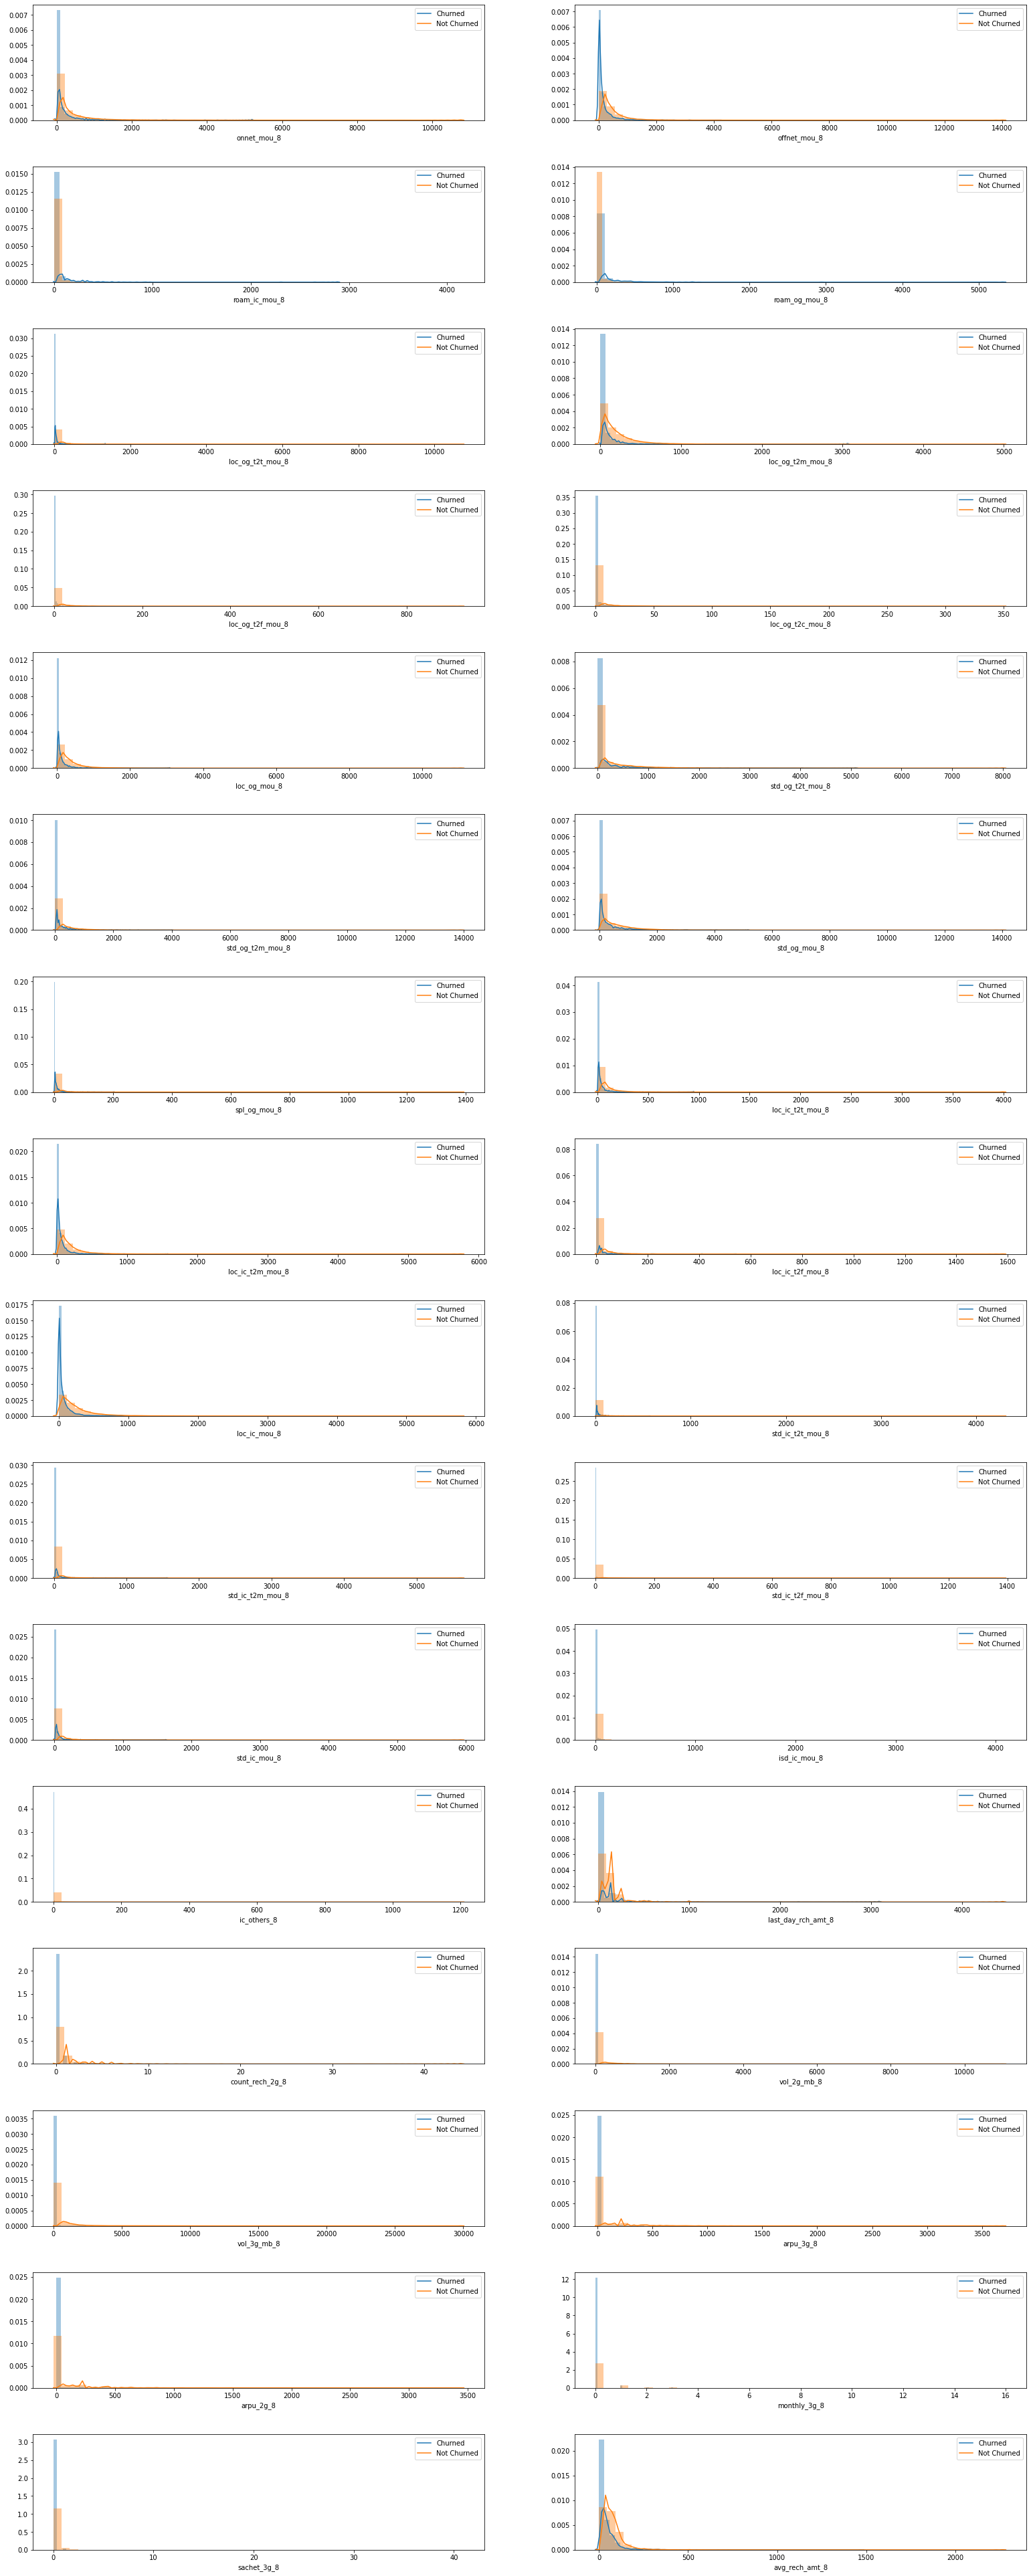

In [ ]:
plt.figure(figsize=(15,70))
plt.subplots_adjust(hspace = 0.4, right=1.5)
for i in enumerate(month_8_cols):
    plt.subplot(16,2, i[0]+1)
    sb.distplot(hvc_knn[hvc_knn['churn']==1][i[1]],hist = True, kde_kws={"label": "Churned"})
    sb.distplot(hvc_knn[hvc_knn['churn']==0][i[1]],hist = True, kde_kws={"label": "Not Churned"})
plt.show()

<strong><font color=green>
- Graphs shifted to left indicates presence of outliers
- Users with less average revenue in 8th month are more likely to churn
- For churned customers calls(incoming/outgoing, local/std) and data usage has also decreased in 8th month
- Number of recharges and recharge amount has also decreased

- **Checking Correlation**

In [ ]:
def Find_Correlation(data):
    # create correlation matrix
    corr = data.corr()
    # replace one's and repetative values with NaN
    corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
    corr_df = corr.unstack().reset_index()
    corr_df.columns = ['VAR1','VAR2','Correlation']
    # dropping NA's
    corr_df.dropna(subset=['Correlation'], inplace=True)
    corr_df.sort_values('Correlation', ascending=False)
    corr_df['Correlation'] = round(corr_df['Correlation'],2)
    corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
    return corr_df.sort_values('Correlation_abs', ascending=False)

In [ ]:
cor = Find_Correlation(hvc_knn)
cor

,VAR1,VAR2,Correlation,Correlation_abs
9347,arpu_2g_8,arpu_3g_8,0.93,0.93
3163,std_og_t2t_mou_8,onnet_mou_8,0.86,0.86
9677,monthly_3g_8,arpu_2g_8,0.86,0.86
9567,monthly_3g_7,arpu_2g_7,0.86,0.86
2943,std_og_t2t_mou_6,onnet_mou_6,0.85,0.85
3053,std_og_t2t_mou_7,onnet_mou_7,0.85,0.85
3383,std_og_t2m_mou_7,offnet_mou_7,0.85,0.85
3493,std_og_t2m_mou_8,offnet_mou_8,0.85,0.85
5384,loc_ic_mou_6,loc_ic_t2m_mou_6,0.85,0.85
5604,loc_ic_mou_8,loc_ic_t2m_mou_8,0.85,0.85


- **Dropping highly correlated variables**

In [ ]:
highly_corr_vars = ['arpu_2g_8','std_og_t2t_mou_8','arpu_2g_7','std_og_t2t_mou_6','std_og_t2t_mou_7',
                   'std_og_t2m_mou_7','std_og_t2m_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_8','arpu_2g_6']

In [ ]:
hvc_knn.drop(columns=highly_corr_vars,inplace=True)

In [ ]:
hvc_knn.shape

(30011, 99)

- **Outliers detection**

Lets generate a Healthcheck to generate a better view

In [ ]:
def num_healthcheck(data):
    perc = [0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.01, 0.02, 0.03, 0.04, 0.05,
            0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94,
            0.95, 0.96,
            0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1]
    data_Stats = data.describe(percentiles=perc).T
    data_Stats['Name of variable'] = data_Stats.index
    data_Stats['Q1'] = data_Stats['25%']
    data_Stats['Q3'] = data_Stats['75%']
    data_Stats['IQR'] = data_Stats['Q3'] - data_Stats['Q1']
    data_Stats['upper_bound'] = data_Stats['Q3'] + 1.5 * data_Stats['IQR']
    data_Stats['lower_bound'] = data_Stats['Q1'] - 1.5 * data_Stats['IQR']
    data_Stats['No of points crossing upper_bound'] = (data > data_Stats['upper_bound']).sum()
    data_Stats['No of points crossing lower_bound'] = (data < data_Stats['lower_bound']).sum()
    Healthcheck = pd.DataFrame(data_Stats)
    return Healthcheck

In [ ]:
Healthcheck = num_healthcheck(hvc_knn)
Healthcheck

,count,mean,std,min,0%,0.01%,0.02%,0.03%,0.04%,0.05%,0.06%,0.07%,0.08%,0.09%,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,99.1%,99.2%,99.3%,99.4%,99.5%,99.6%,99.7%,99.8%,99.9%,100%,max,Name of variable,Q1,Q3,IQR,upper_bound,lower_bound,No of points crossing upper_bound,No of points crossing lower_bound
onnet_mou_6,30011.0,296.533165,460.598620,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.883000,2.2300,3.610000,5.030000,6.580000,8.160000,9.740000,11.540,30.5900,41.900000,54.280000,85.130,126.060000,184.0600,282.230,353.38500,453.280000,795.0100,849.0610,909.306000,990.53400,1066.860,1154.40500,1283.162000,1444.22900,1694.6760,2166.370000,2240.28480,2344.94160,2464.924000,2593.4156,2732.48900,2984.4240,3214.82050,3425.02840,4135.989400,7376.710,7376.710,onnet_mou_6,41.900000,353.38500,311.485000,820.612500,-425.327500,2846,0
onnet_mou_7,30011.0,304.653596,481.613077,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.950081,2.1100,3.410000,4.802000,6.324000,7.808000,9.280000,10.960,29.8300,41.460000,53.590000,83.390,125.560000,186.6400,284.960,359.92500,467.090000,824.3800,878.3520,941.990000,1016.14500,1097.124,1208.17500,1344.040000,1497.25400,1772.6180,2220.367000,2292.90280,2384.85800,2482.802100,2650.0678,2782.40000,2981.2420,3220.30850,3644.32460,4420.528000,8157.780,8157.780,onnet_mou_7,41.460000,359.92500,318.465000,837.622500,-436.237500,2918,0
onnet_mou_8,30011.0,268.438319,466.187505,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.1040,0.660000,1.390000,2.337000,3.330000,4.430000,5.540,19.9100,28.735000,39.630000,64.410,100.190000,150.7900,234.890,297.99500,389.340000,723.6300,783.7870,848.964000,920.96100,1007.558,1115.66000,1256.336000,1441.52700,1700.2360,2188.504000,2274.71970,2358.74040,2465.291900,2597.4948,2764.00350,2945.4540,3190.88760,3562.07220,4253.176500,10752.560,10752.560,onnet_mou_8,28.735000,297.99500,269.260000,701.885000,-375.155000,3135,0
offnet_mou_6,30011.0,418.888338,469.945436,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.03000,7.186000,13.795000,19.7840,26.570000,32.786000,38.974000,45.030000,50.639000,55.990,111.2300,138.430000,164.340000,220.910,282.430000,357.2400,457.680,523.29500,611.990000,916.0300,966.7640,1031.590000,1094.76700,1168.092,1271.47000,1406.070000,1578.81800,1837.9340,2326.290000,2396.72150,2468.50200,2543.565400,2649.2402,2746.66400,2993.9032,3275.75150,3591.87280,4175.642800,8362.360,8362.360,offnet_mou_6,138.430000,523.29500,384.865000,1100.592500,-438.867500,2076,0
offnet_mou_7,30011.0,424.605583,486.037214,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.01000,7.464000,13.502000,20.1120,26.595602,32.572000,38.710000,44.676000,50.174140,56.040,109.8600,136.160000,163.160000,219.090,282.160000,359.6800,463.780,532.77500,628.710000,935.6900,984.0200,1038.090000,1103.92600,1186.358,1286.28500,1407.782000,1585.01500,1838.3900,2410.104000,2486.13800,2572.73520,2681.847000,2759.7662,2894.07400,3107.5768,3435.59150,3813.95280,4546.461500,9667.130,9667.130,offnet_mou_7,136.160000,532.77500,396.615000,1127.697500,-458.762500,2013,0
offnet_mou_8,30011.0,376.600747,476.456330,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.243577,1.899483,4.2300,7.500000,11.052000,14.824660,19.085334,23.476000,27.760,73.6400,98.060000,123.790000,177.880,241.290000,314.8900,415.930,482.73500,565.140000,853.7900,899.2860,953.354000,1017.34600,1096.618,1188.46000,1305.322000,1481.56600,1739.0100,2211.642000,2278.62880,2407.54760,2486.934000,2619.8268,2838.07400,3041.8032,3263.72410,3693.99660,4472.337500,14007.340,14007.340,offnet_mou_8,98.060000,482.73500,384.675000,1059.747500,-478.952500

<strong><font color=green>
- We can see that we have outliers in almost all variables
- We will do power transformation to handle the outliers after splitting the data in train and test